# Diffusion Coefficients

## Overview

The `polykin.properties.diffusion` module provides methods to correlate and estimate mutual and self-diffusion coefficients in liquid mixtures.


| Class/Function            | Solution type            | Calculated property                     |                
|---------------------------|--------------------------|-----------------------------------------|
| `VrentasDudaBinary`       | Binary polymer solution  | Mutual and self-diffusion coefficient   | 
| `DL_Wilke_Chang`          | Binary liquid solution   | Infinite-dilution diffusion coefficient |
| `DL_Hayduk_Minhas`        | Binary liquid solution   | Infinite-dilution diffusion coefficient |
| `DV_Wilke_Lee`            | Binary gas solution      | Mutual diffusion coefficient            |

Information about the corresponding arguments and their units are documented in the respective docstrings.

## Polymer solution

### Vrentas-Duda model

In [1]:
# %pip install polykin
from polykin.properties.diffusion import VrentasDudaBinary

The Vrentas-Duda model is perhaps the most widely used method to describe the effect of temperature and solvent content on the diffusivity of polymer solutions. For this demonstration, let's consider the binary system toluene / poly(vinyl acetate) along with the free-volume parameters reported in Table 4 of [Zielinski & Duda, 1992](https://www.researchgate.net/profile/John-Zielinski/publication/229572945_Predicting_PolymerSolvent_Diffusion_Coefficients_Using_Free-Volume_Theory/links/5aafb759a6fdcc1bc0bd019b/Predicting-Polymer-Solvent-Diffusion-Coefficients-Using-Free-Volume-Theory.pdf). To instantiate a model object, we call the respective class constructor with the parameters specific to this method.

In [2]:
d = VrentasDudaBinary(
    D0=4.82e-4, E=0., v1star=0.917, v2star=0.728, z=0.82,
    K11=1.45e-3, K12=4.33e-4, K21=-86.32, K22=-258.2, X=0.5,
    unit='cm²/s',
    name='Tol(1)/PVAc(2)'
)

In [3]:
d

name: Tol(1)/PVAc(2)
unit: cm²/s
D0:   0.000482
E:    0.0
v1*:  0.917
v2*:  0.728
ξ:    0.82
K11:  0.00145
K12:  0.000433
K21:  -86.32
K22:  -258.2
Tg1:  0.0
Tg2:  0.0
𝛾:    1.0
𝜒:    0.5

To evaluate the solvent self-diffusion coefficient or the mutual diffusion coefficient, we call the instance directly with the solvent mass fraction and the temperature as mandatory arguments (scalar or array-like). The temperature unit can be passed as optional argument (default is K). By default, the method delivers the mutual diffusion coefficient.

In [4]:
# D at w1=0.2 and T=25°C.
d(0.2, 25.0, Tunit='C')

np.float64(3.789815380454319e-08)

In [5]:
# D at w1=[0.2, 0.3, 0.4] and T=298.15K.
d([0.2, 0.3, 0.4], 298.15)

array([3.78981538e-08, 2.14599443e-07, 4.51290147e-07])

To get the solvent self-diffusion coefficient instead of the mutual diffusion coefficient, we just need to flip the keyword argument `selfd`.

In [6]:
# D1 at w1=0.2 and T=50°C.
d(0.2, 25.0, Tunit='C', selfd=True)

np.float64(7.401983164949841e-08)

The class comes with a convenient built-in method called `plot()` to enable a rapid visualization of the effects of composition and temperature.
Let's reproduce Figure 6 of [Zielinski & Duda, 1992](https://www.researchgate.net/profile/John-Zielinski/publication/229572945_Predicting_PolymerSolvent_Diffusion_Coefficients_Using_Free-Volume_Theory/links/5aafb759a6fdcc1bc0bd019b/Predicting-Polymer-Solvent-Diffusion-Coefficients-Using-Free-Volume-Theory.pdf).

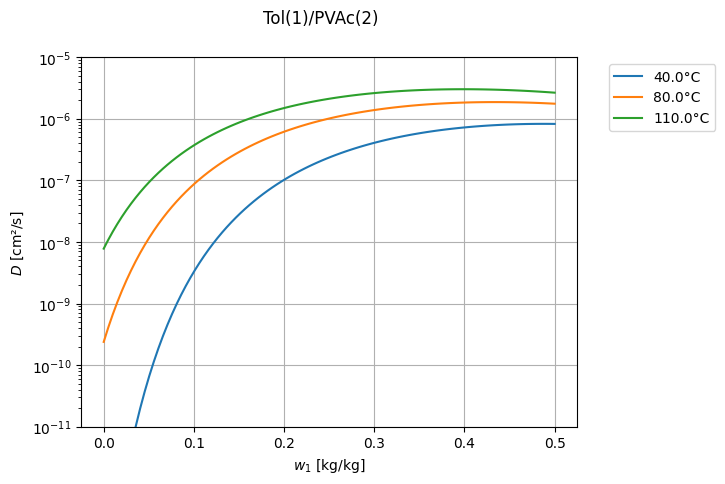

In [7]:
d.plot(T=[40.0, 80.0, 110.0], Tunit='C', ylim=(1e-11, 1e-5))

We can also generate the analogous plot for the solvent self-diffusion coefficient.

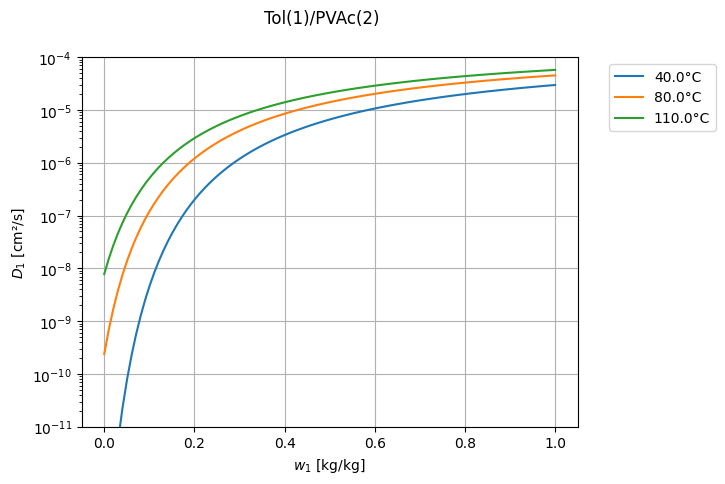

In [8]:
d.plot(T=[40.0, 80.0, 110.0], Tunit='C', selfd=True,
       w1range=(0.0, 1.0), ylim=(1e-11, 1e-4))

Notice how the solvent self-diffusion coefficient is a monotonically increasing function of the solvent content, unlike the mutual diffusion coefficient.

## Binary liquid solutions

### Wilke-Chang and Haduk-Minhas correlations

In [9]:
from polykin.properties.diffusion import DL_Hayduk_Minhas, DL_Wilke_Chang

The Wilke-Chang and Haduk-Minhas correlations are among the most used to estimate the infinite-dilution diffusion coefficient of a solute in a solvent. Let's apply both methods to estimate the diffusion coefficient of vinyl chloride in liquid water.

In [10]:
DL_Wilke_Chang(
    T=298.0,        # temperature
    MA=62.5e-3,     # molar mass of vinyl chloride
    MB=18.0e-3,     # molar mass of water
    rhoA=910.0,     # density of vinyl chloride at the normal boiling point
    viscB=0.89e-3,  # viscosity of water at solution temperature
    phi=2.6         # association factor for water (see docstring)
)

1.339916480081557e-09

In [11]:
DL_Hayduk_Minhas(
    T=298.0,           # temperature
    method='aqueous',  # equation for aqueous solutions
    MA=62.5e-3,        # molar mass of vinyl chloride
    rhoA=910.0,        # density of vinyl chloride at the normal boiling point
    viscB=0.89e-3      # viscosity of water at solution temperature
)

1.2579698249278908e-09

## Binary gas mixtures

### Wilke-Lee correlation

In [12]:
from polykin.properties.diffusion import DV_Wilke_Lee

The Wilke-Lee correlation is general and reliable method to estimate the diffusivity of a binary gas solution. Let's apply it to estimate the diffusion coefficient of vinyl chloride in air.

In [13]:
DV_Wilke_Lee(
    T=298.0,       # temperature
    P=1e5,         # pressure
    MA=62.5e-3,    # molar mass of vinyl chloride
    MB=29.0e-3,    # molar mass of air
    rhoA=910.0,    # density of vinyl chloride at the normal boiling point
    rhoB=None,     # air (see docstring)
    TA=260.0,      # normal boiling point of vinyl chloride
    TB=None,       # air (see docstring)
)

np.float64(1.1652957293550837e-05)

And, for comparison, the diffusion coefficient of vinyl chloride through water vapor.  

In [14]:
DV_Wilke_Lee(
    T=298.0,       # temperature
    P=1e5,         # pressure
    MA=62.5e-3,    # molar mass of vinyl chloride
    MB=18.0e-3,    # molar mass of water
    rhoA=910.0,    # density of vinyl chloride at the normal boiling point
    rhoB=959.0,    # density of water at the normal boiling point
    TA=260.0,      # normal boiling point of vinyl chloride
    TB=373.0,      # normal boiling point of water
)

np.float64(1.1035218654621124e-05)